# Assignment 7 (Week 7)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
```

## Name: EBOAGU CHIAMAKA

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [1]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd


# pandas settings
pd.options.display.max_rows = 100_000
pd.options.display.max_columns = 100_000
pd.options.display.max_colwidth = 100_000


# Black code formatter (Optional)
%reload_ext lab_black

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

>The code below defines a function called data_import that is used to import data from a CSV file into a Pandas DataFrame.

> The function takes two arguments:

> * filename (required): The name of the CSV file to be imported. This argument will be passed as a keyword argument (i.e., filename=<value>).

> * sep (optional): The separator used in the CSV file. The default value is ",". 

> The function returns the loaded dataframe and also prints the shape of the dataframe to the console.`

In [3]:
def data_import(*, filename: str, sep: str = ",") -> pd.DataFrame:
    """This is used to load the data.

    Params;
        filename (str): The filepath.
        sep (str, default=",")

    Returns:
        data (pd.DataFrame): The loaded dataframe.
    """
    df = pd.read_csv(filename, sep=sep)
    print(f"Shape of data:{df.shape}\n")
    return df

>The codecalls the data_import() function to load the CSV file and assigns the resulting DataFrame to the variable df. Finally, df.head() displays the first five rows of the DataFrame to verify that the data was imported correctly.

In [4]:
df = data_import(filename="salary.csv")
df.head()

Shape of data:(32560, 15)



,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


> Using df.describe() method in pandas library of Python to provide descriptive statistics of a DataFrame. The statistics include count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values for each column in the DataFrame.

In [5]:
df.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


> Using df.info() method in pandas library of Python to provide a concise summary of a DataFrame. The summary includes the total number of rows, the number of non-null values, and the data type of each column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Final_weight    32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Country         32560 non-null  object
 14  Salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


>` Using df.isna().sum() method in pandas library of Python to returns the total number of missing (null or NaN) values in each column of a DataFrame. `

In [7]:
df.isna().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

>`Created a function that takes a keyword argument data, which is a pandas DataFrame, and returns the unique values in each column of the DataFrame. The function works by iterating over each column in the DataFrame and calling the unique() method to return the unique values in that column.`

In [8]:
# Function to show the unique variables
def uni_value(*, data):
    for col in data:
        print(f"{col}: {data[col].unique()}\n")

>`Called the uni_value function to find the unique values in each column in the Dataframe`

In [9]:
uni_value(data=df)

Age: [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Workclass: [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Final_weight: [ 83311 215646 234721 ...  34066  84661 257302]

Education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Education_num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Marital_status: [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']

Occupation: [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-f

> `using df.isnull().values.any() method that returns True if there are any missing (null or NaN) values in the DataFrame, and False otherwise`

In [10]:
df.isnull().values.any()

False

***

<div style="background-color: #e834eb; width: 100%; height: 30px;"></div>


## Dropping Columns

### I intend to drop the following columns:
* Final_weight - Has too any unique values
* Capital_gain - Has too many outliners
* Capital_loss - Has too many outliners


>`The code df["Final_weight"].value_counts() is used to obtain the count of unique values in the column named "Final_weight" in a Pandas DataFrame df. The output of this code is a Pandas Series containing the count of each unique value in the "Final_weight" column, sorted in descending order. The index of this Series is the unique values in the "Final_weight" column and the values of the Series is their respective counts.`


In [11]:
df["Final_weight"].value_counts()

164190     13
203488     13
123011     13
148995     12
126675     12
113364     12
121124     12
123983     11
188246     11
111483     11
102308     11
120277     11
120131     11
241998     11
190290     11
126569     11
155659     11
99185      10
125461     10
125933     10
155489     10
174789     10
112497     10
117963     10
194630     10
193882     10
125892     10
186934     10
216129     10
119793     10
177675     10
202872      9
129573      9
200471      9
124963      9
214542      9
221172      9
82393       9
112847      9
218490      9
194901      9
111567      9
118551      9
116632      9
175262      9
154374      8
151089      8
185041      8
157747      8
138768      8
161141      8
147258      8
132601      8
210736      8
163665      8
144949      8
111128      8
108435      8
213140      8
104501      8
210781      8
176185      8
176683      8
172538      8
169104      8
130620      8
108140      8
132879      8
184655      8
160120      8
144778      8
181091

>`The code df["Capital_loss"].value_counts() is used to obtain the count of unique values in the column named "Capital_loss" in a Pandas DataFrame df. The output of this code is a Pandas Series containing the count of each unique value in the "Capital_loss" column, sorted in descending order. The index of this Series is the unique values in the "Capital_loss" column and the values of the Series is their respective counts.`


In [12]:
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
1485       51
2415       49
1602       47
1740       42
1590       40
1876       39
1672       34
1564       25
2258       25
2001       24
1669       24
1741       24
1980       23
1719       22
2051       21
2002       21
1408       21
1579       20
2377       20
1504       18
1721       18
1974       18
2339       17
2179       15
1628       15
1762       14
2559       12
625        12
2444       12
2824       10
1617        9
2042        9
2205        9
2392        9
1651        9
1594        8
2174        7
1380        7
1340        7
1092        7
2206        6
2057        6
880         6
1573        6
2246        6
2603        5
213         4
1825        4
1668        4
1258        4
2547        4
1726        4
2129        3
419         3
2231        3
2267        3
2457        3
323         3
653         3
4356        3
3770        2
1755        2
3683        2
1648        2
2754        2
3900        2
1138  

>`The code df["Capital_gain"].value_counts() is used to obtain the count of unique values in the column named "Capital_gain" in a Pandas DataFrame df. The output of this code is a Pandas Series containing the count of each unique value in the "Capital_gain" column, sorted in descending order. The index of this Series is the unique values in the "Capital_gain" column and the values of the Series is their respective counts.`

In [13]:
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        47
10520       43
4064        42
14084       41
4650        41
3137        37
20051       37
27828       34
594         34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
2885        24
3411        24
2176        23
4787        23
3464        23
9386        22
2597        20
4101        20
2407        19
4865        17
2202        16
1506        15
3942        14
3674        14
4416        12
2580        12
4508        12
3781        12
10605       12
2463        11
2907        11
5455        11
2354        11
2635        11
25236       11
6497        11
7430         9
2105         9
6418         9
2964         9
2977         8
1151         8
2414         8
3471         8
914          8
4934         7
1831         7
1409         7
1471         7
3818         7
1797      

>`Using df["Capital_loss"].plot(kind="hist", bins=10) to create a histogram plot of the "Capital_loss" column in a Pandas DataFrame df. The kind="hist" parameter specifies that the plot type should be a histogram, and the bins=10 parameter specifies that the data should be grouped into 10 bins. The resulting plot displays the distribution of "Capital_loss" values in the DataFrame, with the x-axis representing the bin ranges and the y-axis representing the count of values in each bin. The resulting plot is used to help identify patterns or anomalies in the data, such as whether the data is skewed or has outliers.`

<Axes: ylabel='Frequency'>

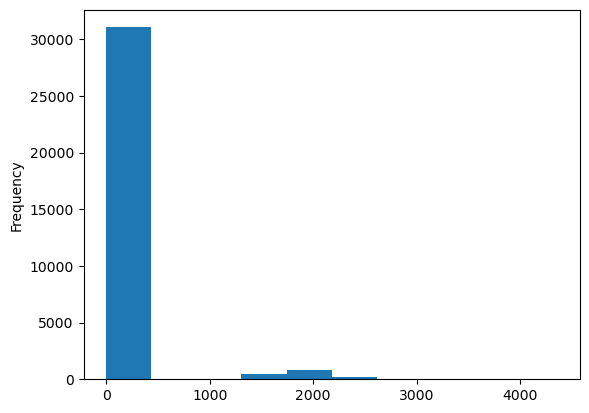

In [14]:
df["Capital_loss"].plot(kind="hist", bins=10)

>`Using df["Capital_gain"].plot(kind="hist", bins=10) to create a histogram plot of the "Capital_gain" column in a Pandas DataFrame df. The kind="hist" parameter specifies that the plot type should be a histogram, and the bins=10 parameter specifies that the data should be grouped into 10 bins. The resulting plot displays the distribution of "Capital_loss" values in the DataFrame, with the x-axis representing the bin ranges and the y-axis representing the count of values in each bin. The resulting plot is used to help identify patterns or anomalies in the data, such as whether the data is skewed or has outliers.`

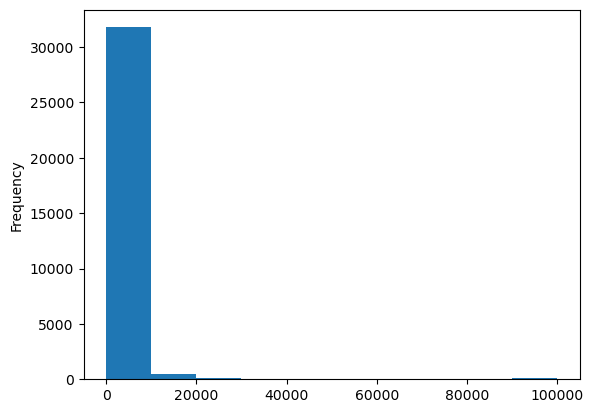

In [15]:
ax = df["Capital_gain"].plot(kind="hist", bins=10)

***

`Dropped the specified columns - Capital_gain, Capital_loss, Final_weight`

In [16]:
df = df.drop(["Capital_gain", "Capital_loss", "Final_weight"], axis=1)
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


***

<div style="background-color: #e834eb; width: 100%; height: 30px;"></div>


### Removing space

`The code below performs string replacement on several columns in a the DataFrame- df.For each column specified, the code replaces any occurrences of whitespace (i.e., spaces, tabs, etc.) with an empty string.`

In [17]:
df["Race"] = df["Race"].str.replace(" ", "")
df["Sex"] = df["Sex"].str.replace(" ", "")
df["Country"] = df["Country"].str.replace(" ", "")
df["Salary"] = df["Salary"].str.replace(" ", "")
df["Education"] = df["Education"].str.replace(" ", "")
df["Workclass"] = df["Workclass"].str.replace(" ", "")
df["Marital_status"] = df["Marital_status"].str.replace(" ", "")
df["Occupation"] = df["Occupation"].str.replace(" ", "")
df["Relationship"] = df["Relationship"].str.replace(" ", "")

***

<div style="background-color: #e834eb; width: 100%; height: 30px;"></div>


#### Value Count
`Obtain the count of unique values the following columns `

In [18]:
df["Workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [19]:
df["Country"].value_counts()

United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [20]:
df["Occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [21]:
df["Relationship"].value_counts()

Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: Relationship, dtype: int64

In [22]:
df["Education"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64

In [23]:
df["Marital_status"].value_counts()

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [24]:
df["Race"].value_counts()

White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

***

<div style="background-color: #e834eb; width: 100%; height: 30px;"></div>


### Replacing variables

`The code below performs various data cleaning and transformation operations on different columns in a Pandas DataFrame df. Details of each section of the code includes:`

* Workclass: Replaces any occurrences of the value "?" in the "Workclass" column with the mode (i.e., the most frequent value) of the column.
* Country: Replaces any occurrences of the value "?" in the "Country" column with the mode of the column.
* Occupation: Replaces any occurrences of the value "?" in the "Occupation" column with the mode of the column.
* Relationship: Replaces any occurrences of the value "?" in the "Relationship" column with the mode of the column.
* Education: Groups together some education levels (9th, 11th, 7th-8th, 12th, and 10th) into a new category called "High School", groups together some education levels (5th-6th, 1st-4th) into a new category called "Elementary School", groups together some education levels (HS-grad, Some-college) into a new category called "High_Sch_graduate", and replaces the "Doctorate" category with "Doctorate".
* Marital_status: Groups together certain marital statuses (Divorced, Married-spouse-absent, Separated, Widowed, and Never-married) into a new category called "No_Spouse".
* Race: Replaces the category "Other" in the "Race" column with "Amer-Indian-Eskimo".



In [25]:
# ===Workclass====
feat = "Workclass"
label = "?"
replace_val = df["Workclass"].mode().values[0]
df[feat] = np.where(df[feat] == label, replace_val, df[feat])


# ===Country====
feat = "Country"
label = "?"
replace_val = df["Country"].mode().values[0]
df[feat] = np.where(df[feat] == label, replace_val, df[feat])

# ===Occupation====
feat = "Occupation"
label = "?"
replace_val = df["Occupation"].mode().values[0]
df[feat] = np.where(df[feat] == label, replace_val, df[feat])

# ===Relationship====
feat = "Relationship"
label = "?"
replace_val = df["Relationship"].mode().values[0]
df[feat] = np.where(df[feat] == label, replace_val, df[feat])


# ===Education High School====
feat = "Education"
Label = ["9th", "11th", "7th-8th", "12th", "10th"]
replace_val = "High School"
df[feat] = np.where(df[feat].isin(Label), replace_val, df[feat])

# ===Education Elementary School====
feat = "Education"
Label = [
    "5th-6th",
    "1st-4th",
]
replace_val = "Elementary School"
df[feat] = np.where(df[feat].isin(Label), replace_val, df[feat])

# ===Education Elementary School====
feat = "Education"
Label = ["HS-grad", "Some-college"]
replace_val = "High_Sch_graduate"
df[feat] = np.where(df[feat].isin(Label), replace_val, df[feat])

# ===Doctorate====
feat = "Education"
Label = "Prof-school"
replace_val = "Doctorate"
df[feat] = np.where(df[feat] == Label, replace_val, df[feat])

# ===Marital_status====
feat = "Marital_status"
Label = [
    "Divorced",
    "Married-spouse-absent",
    "Separated",
    "Widowed",
    "Never-married",
]
replace_val = "No_Spouse"
df[feat] = np.where(df[feat].isin(Label), replace_val, df[feat])

# ===Race====
feat = "Race"
Labels = "Other"
replace_val = "Amer-Indian-Eskimo"
df[feat] = np.where(df[feat] == Labels, replace_val, df[feat])

`Called the uni_value function to find the unique values in each column in the Dataframe to confirm that the specied values were replaces`

In [26]:
uni_value(data=df)

Age: [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Workclass: ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Education: ['Bachelors' 'High_Sch_graduate' 'High School' 'Masters' 'Assoc-acdm'
 'Assoc-voc' 'Doctorate' 'Elementary School' 'Preschool']

Education_num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Marital_status: ['Married-civ-spouse' 'No_Spouse' 'Married-AF-spouse']

Occupation: ['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']

Relationship: ['Husband' 'Not-in-family' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Race: ['White' 'Black' 'A

***

<div style="background-color: #e834eb; width: 100%; height: 30px;"></div>


`The code above separates the DataFrame df into two subsets: num_data and cat_data. num_data is a DataFrame that includes only columns with numerical data types. The select_dtypes method is used to select columns with data types that are not "object" (i.e., numerical data types). The exclude parameter is set to ["O"], which excludes columns with data types of "object". cat_data is a DataFrame that includes only columns with object data types. The select_dtypes method is used again, but this time with the include parameter set to ["O"], which only includes columns with data types of "object". The resulting DataFrames are then printed with their shapes, which shows the number of rows and columns in each DataFrame.`

In [27]:
num_data = df.select_dtypes(exclude=["O"])
cat_data = df.select_dtypes(include=["O"])
num_data.shape, cat_data.shape

((32560, 3), (32560, 9))

In [28]:
# numeric variable
num_data.head()

,Age,Education_num,Hours_per_week
0,50,13,13
1,38,9,40
2,53,7,40
3,28,13,40
4,37,14,40


`The code below visualizes the numerical data in the num_data DataFrame using a combination of matplotlib and seaborn libraries.`

`This is to display the distribution of each numerical feature in the dataset. The code first defines the number of rows and columns in the plot grid, as well as a threshold for the number of unique values in a feature for the plot type to be chosen. Then, a for loop iterates over each numerical feature in the num_data DataFrame.`

`For each feature, the code checks if the number of unique values in the feature is greater than the threshold. If it is, a histogram is plotted using sns.histplot(), otherwise, a count plot is plotted using sns.countplot(). The resulting plot for each feature is displayed with a title indicating the feature name.The fig.tight_layout() method is used to adjust the spacing between subplots, and plt.show() displays the plot.`

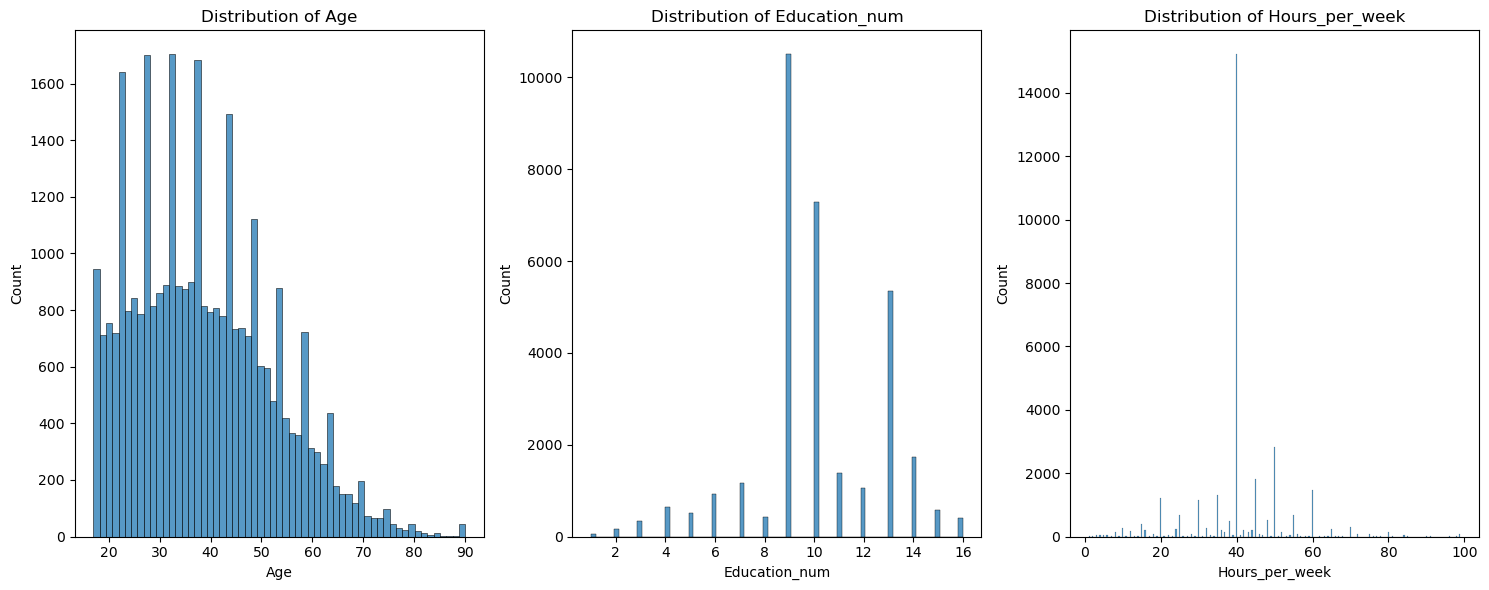

In [29]:
# VISUALIZING THE NUMERIC DATA

n_rows, n_cols = 1, 3
THRESH = 10

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 6))

for idex, feat in enumerate(num_data.columns):
    if n_rows > 1:
        ax = axs[(idex // n_cols), (idex % n_cols)]
    else:
        ax = axs[idex]

    if len(df[feat].unique()) > THRESH:
        sns.histplot(data=df, x=feat, ax=ax)
    else:
        sns.countplot(data=df, x=feat, ax=ax)
    ax.set_title(f"Distribution of {feat}")

fig.tight_layout()
plt.show()

`This code below creates a box plot for each of the numeric features in the dataset, which helps to visualize the distribution of the data and identify any outliers.`

* n_rows, n_cols = 1, 3: This line sets the number of rows and columns for the subplots that will be created. In this case, there will be one row and three columns of subplots.

* THRESH = 10: This line sets a threshold value for the number of unique values in a numeric feature. If a feature has more unique values than this threshold, a histogram will be plotted instead of a box plot.

* fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 6)): This line creates a figure and a set of subplots using Matplotlib's subplots() function. The figsize argument sets the size of the figure.

* The for loop iterates over each numeric feature in the dataset.

* sns.boxplot(data=df, x=feat, ax=ax) creates a box plot for the current feature using Seaborn's boxplot() function. The data argument specifies the dataset, x specifies the column to plot on the x-axis, and ax specifies the current subplot to use.

* ax.set_title(f"Box Plot of {feat}") sets the title for the current subplot. The f string formatting allows the current feature name to be inserted into the title.

* fig.tight_layout() adjusts the subplots to fit in the figure without overlapping.

* plt.show() displays the final figure.

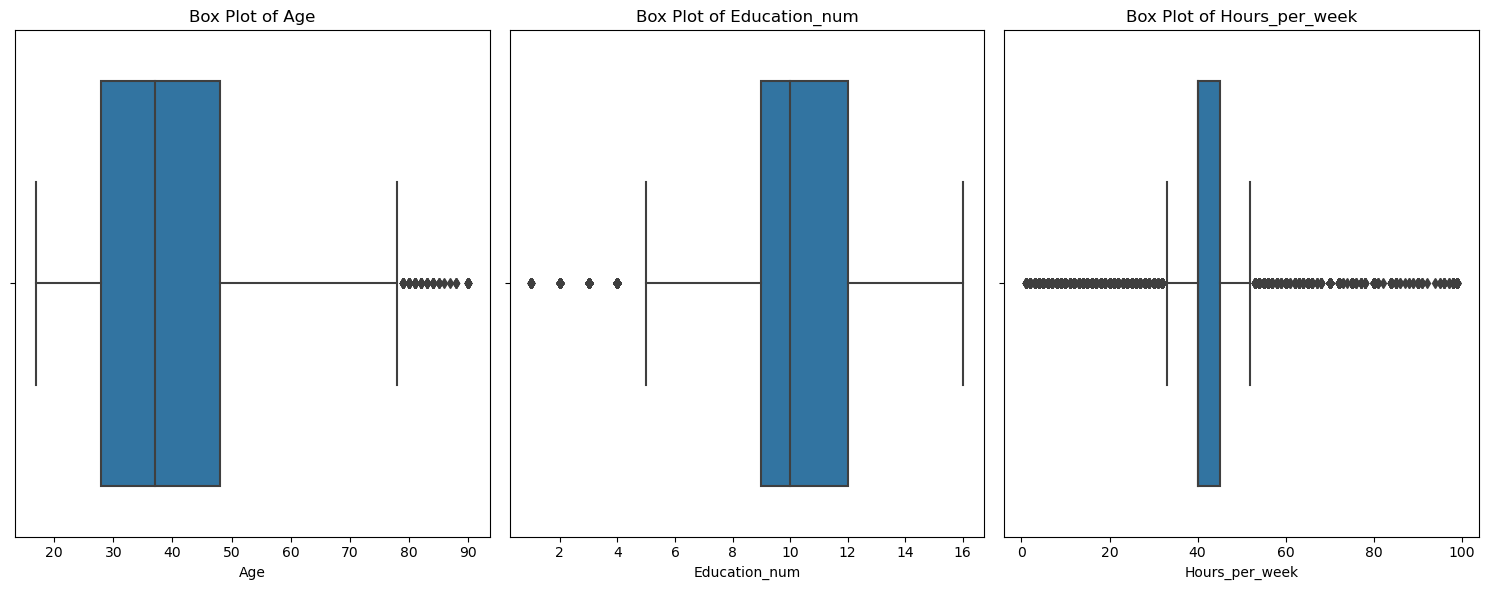

In [30]:
n_rows, n_cols = 1, 3
THRESH = 10

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 6))

for idex, feat in enumerate(num_data.columns):
    if n_rows > 1:
        ax = axs[(idex // n_cols), (idex % n_cols)]
    else:
        ax = axs[idex]

    sns.boxplot(data=df, x=feat, ax=ax)
    ax.set_title(f"Box Plot of {feat}")

fig.tight_layout()
plt.show()

### Categorical Data

In [31]:
cat_data.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Country,Salary
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,High_Sch_graduate,No_Spouse,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,High School,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


***

#### Visualizing the categorical variable


`This is a function called plot_count that takes a pandas DataFrame, a list of feature names, number of rows and columns, and an optional figsize parameter as input. The function returns a count plot of all the specified features.`

`Inside the function, it creates a subplot grid with n_rows rows and n_cols columns using plt.subplots(). Then, it loops over the specified features and creates a count plot of each feature using sns.countplot(). It also sets the title of each subplot using the feature name and ticks the x-axis labels with rotation=80 to avoid label overlap.`

`Finally, the function tightens the layout of the subplots using fig.tight_layout() and displays the plot using plt.show().`

In [36]:
def plot_count(
    data: pd.DataFrame,
    features: list[str],
    n_row: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) -> "Plot":
    """This returns a count plot of all the specified features"""
    fig, axs = plt.subplots(n_row, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_row > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]

        sns.countplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Count Plot of {feat!r}")

        labels = sorted(data[feat].value_counts().index)
        ax.tick_params(axis="x", rotation=80)

    fig.tight_layout()
    plt.show()

`This code calls the function - plot_count and passes the following arguments to it:`

* data: a pandas DataFrame named cat_data that contains only categorical data.
* features: a list of strings representing the names of columns in the cat_data DataFrame.
* n_row: an integer representing the number of rows of subplots in the resulting plot.
* n_cols: an integer representing the number of columns of subplots in the resulting plot.
* figsize: a tuple representing the size of the resulting figure in inches.
The plot_count function is defined to take these arguments and create a count plot of each specified categorical feature in a subplot of the resulting figure. The n_row and n_cols arguments specify the number of rows and columns of subplots in the figure, respectively. The figsize argument specifies the size of the figure. The function iterates over each feature specified in the features list and creates a count plot of that feature in a subplot of the figure. The resulting figure is then displayed using plt.show().`

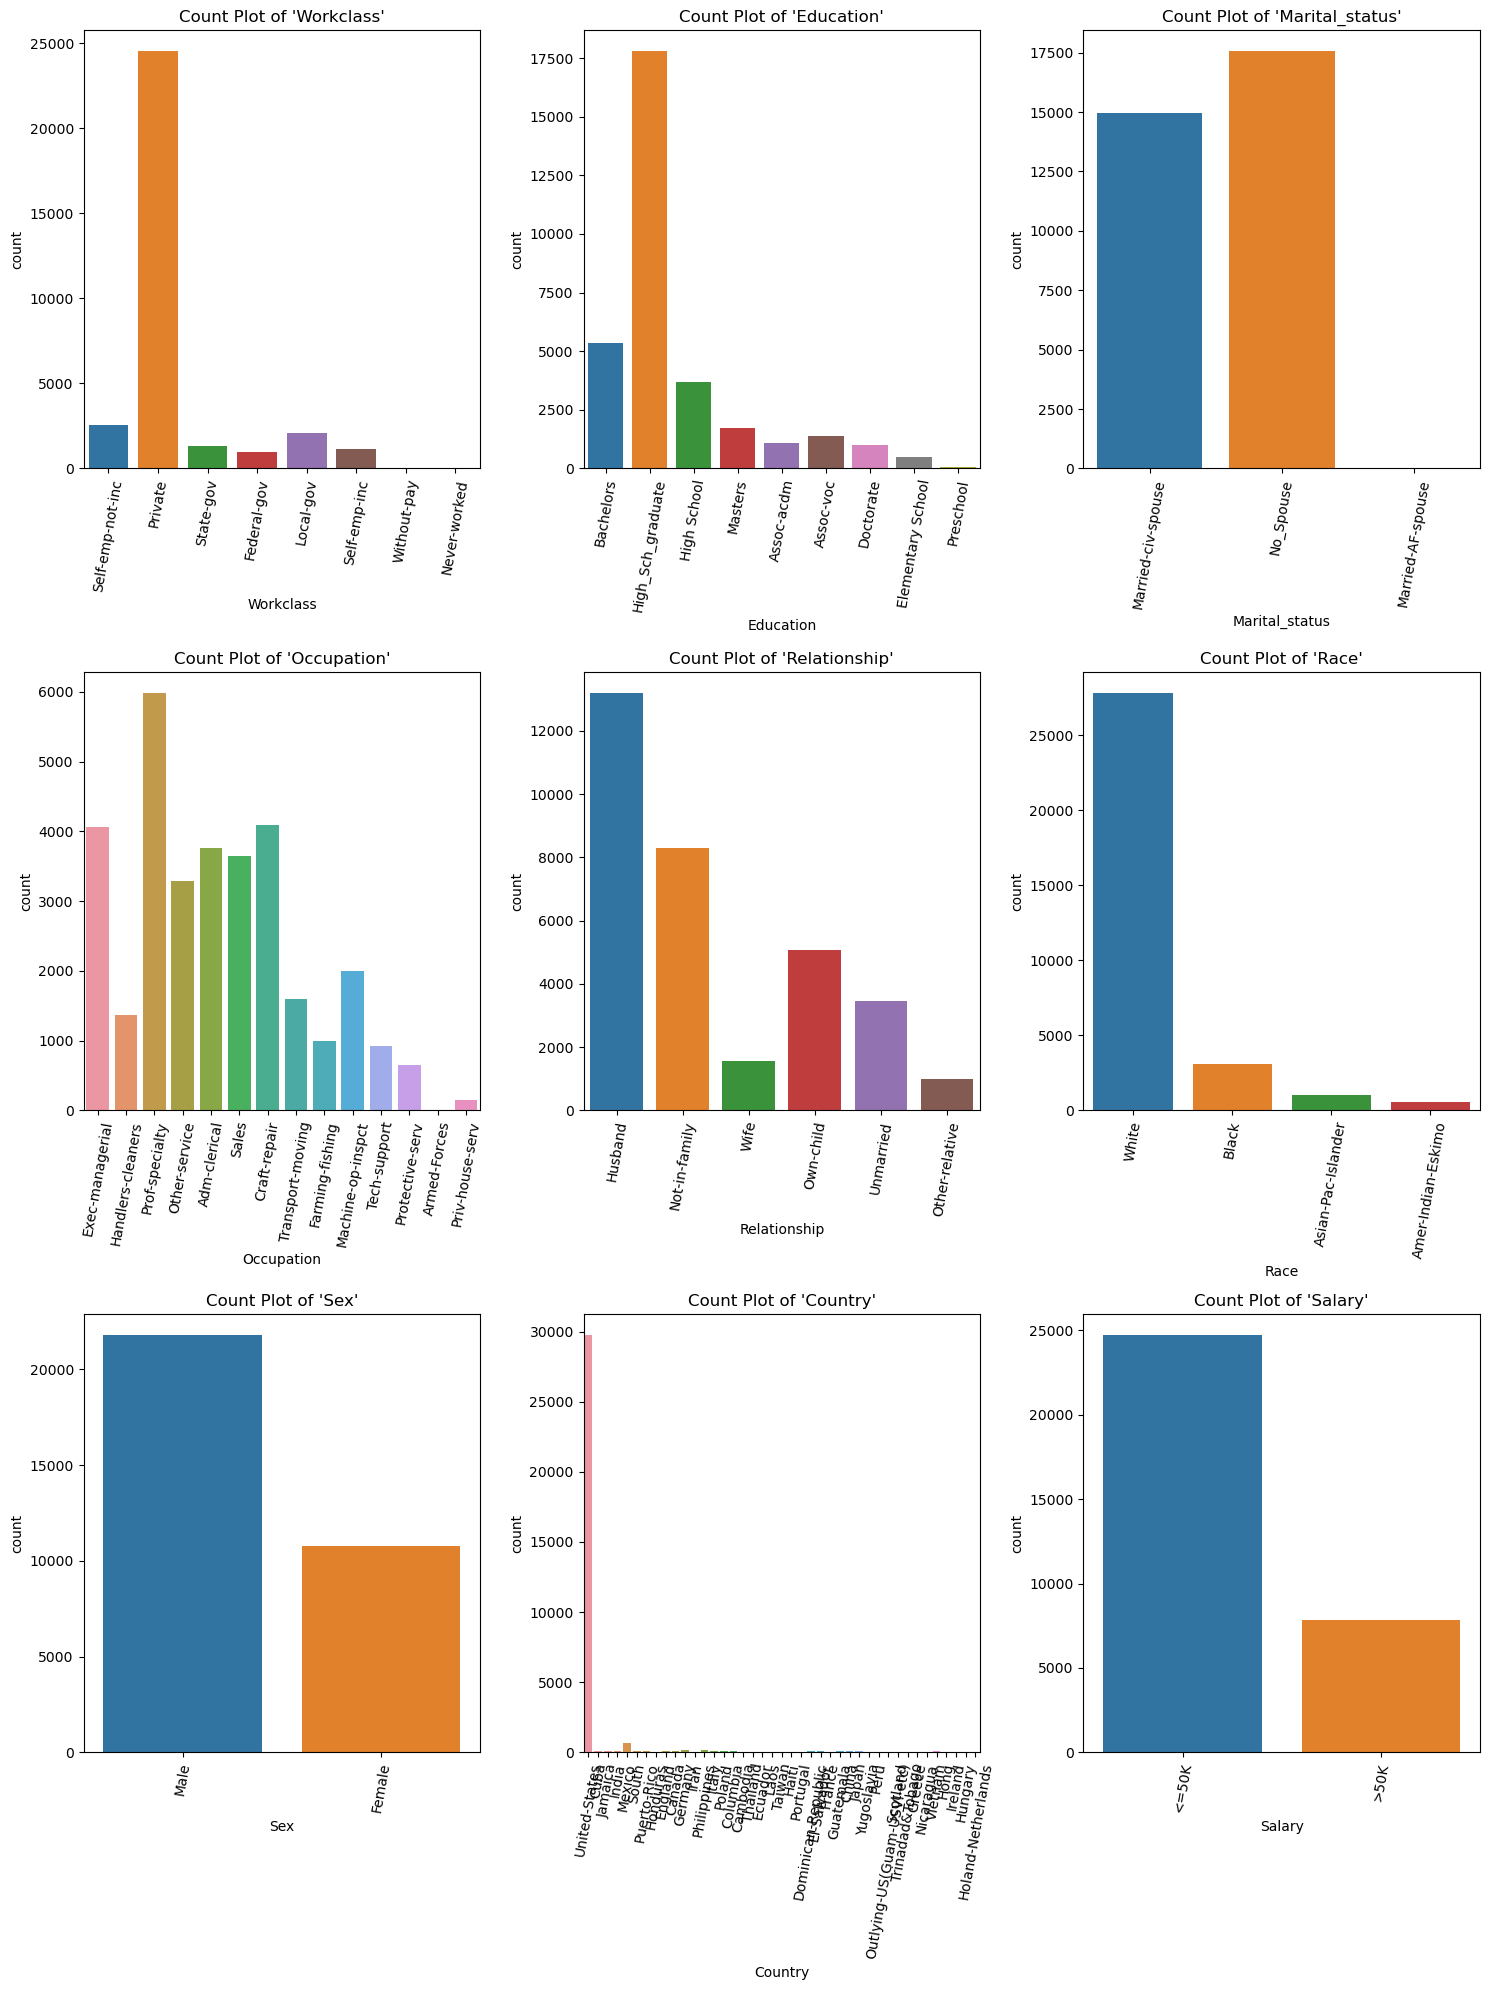

In [35]:
plot_count(
    data=cat_data, features=cat_data.columns, n_row=3, n_cols=3, figsize=(15, 20)
)

***

<div style="background-color: #e834eb; width: 100%; height: 30px;"></div>

## Feature selection

`This code is checking the number of unique values for each feature in the DataFrame df except the Salary feature.`

`It creates an empty dictionary result_dict to store the results. It then loops through each feature in the DataFrame, and if the feature is not the Salary feature, it computes the number of unique values for that feature using the nunique() method, and stores the result in the result_dict dictionary using the feature name as the key.`

`The resulting dictionary result_dict contains the number of unique values for each feature.`

In [37]:
# Check for the number of unique values
TARGET = "Salary"
result_dict = {}

for feat in df.columns:
    if feat != TARGET:
        num_uniq = df[feat].nunique()
        result_dict[feat] = num_uniq

result_dict

{'Age': 73,
 'Workclass': 8,
 'Education': 9,
 'Education_num': 16,
 'Marital_status': 3,
 'Occupation': 14,
 'Relationship': 6,
 'Race': 4,
 'Sex': 2,
 'Hours_per_week': 94,
 'Country': 41}

***

`This code is calculating the correlation matrix of all numerical features in the dataset, excluding the target variable "Salary". It then creates a heatmap using Seaborn's heatmap function, which displays the correlation coefficients between each pair of numerical features. The diagonal line in the heatmap represents the correlation of each feature with itself, which is always equal to 1.  The annot=True parameter displays the correlation coefficients on the heatmap, and fmt=".2f" specifies that the coefficients should be formatted with two decimal places. The resulting heatmap provides a visual representation of the degree of correlation between different features in the dataset.`

C:\Users\Todays Soutions\AppData\Local\Temp\ipykernel_28644\3097577080.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.drop(columns=[TARGET]).corr().abs()


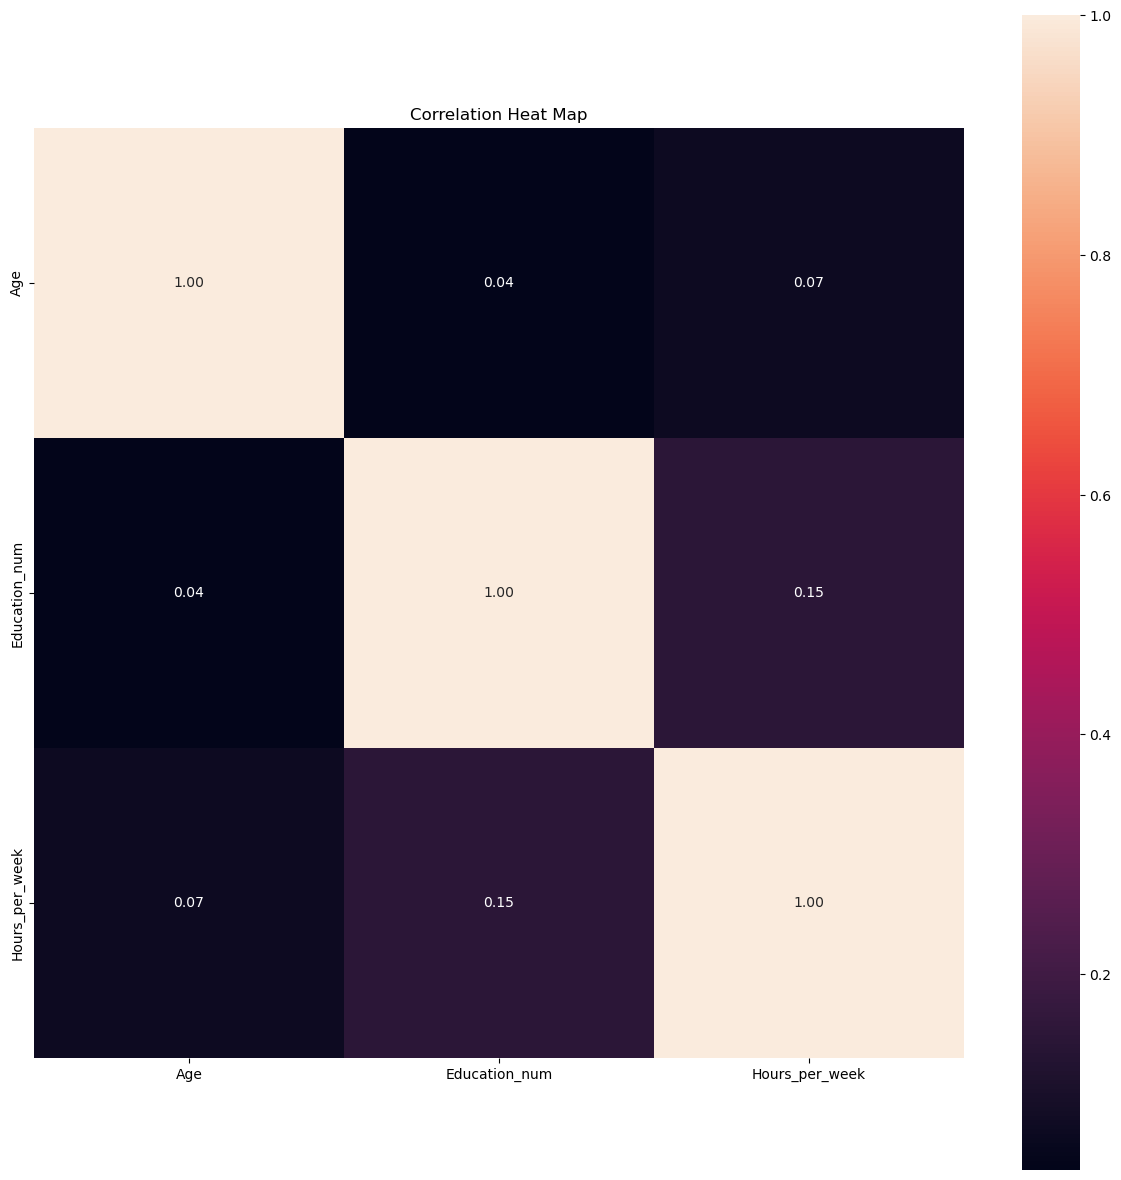

In [38]:
# Check for correlation
corr_matrix = df.drop(columns=[TARGET]).corr().abs()

plt.figure(figsize=(15, 15))
sns.heatmap(data=corr_matrix, annot=True, square=True, fmt=".2f")
plt.title("Correlation Heat Map")
plt.show()

### FEATURE ENCODING

`This code returns an array of unique values in the "Country" column of the dataframe df after applying the conditional operation on it.`

In [39]:
df["Country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

`df["Country"].value_counts() gives the count of unique values in the "Country" column`

In [40]:
df["Country"].value_counts()

United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

`Since majority of the countries is US I grouped the rest as others_countries, This code updates the values in the "Country" column of the dataframe df. It uses the np.where function to check if the value in the "Country" column is "United-States". If it is "United-States", it is replaced with "United-States". If it is any other country, it is replaced with "Other-Countries". The updated values are stored back in the "Country" column of the dataframe df.`

In [41]:
df["Country"] = np.where(
    df["Country"] == "United-States", "United-States", "Other-Countries"
)

`It will give the count of unique values in the "Country" column after replacing all the countries other than "United-States" with "Other-Countries".  The output will show the count of rows belonging to "United-States" and "Other-Countries" respectively.`

In [42]:
df["Country"].value_counts()

United-States      29752
Other-Countries     2808
Name: Country, dtype: int64

***

<div style="background-color: #e834eb; width: 100%; height: 30px;"></div>

### Converting Salary column to numeric values

`df["Salary"].value_counts() gives the count of unique values in the "Salary" column`

In [43]:
df["Salary"].unique()

array(['<=50K', '>50K'], dtype=object)

`This code converts the values of the "Salary" column from categorical values to numerical values, where all values of "<=50K" are converted to 0 and all values of ">50K" are converted to 1.`

In [44]:
#### Assigning outcome as ) if income is <=50K and 1 if income is >=50k
df["Salary"] = [0 if x == "<=50K" else 1 for x in df["Salary"]]

### Creating Dummy variables

`The function first selects the categorical columns in the input DataFrame df. Then, it uses the pd.get_dummies() function to create a new DataFrame with dummy variables for all categorical columns. The original categorical columns are dropped from the new DataFrame, and the resulting DataFrame with dummy variables is concatenated with the original DataFrame. Finally, the function returns the new DataFrame data with dummy variables and without the original categorical columns.`

In [45]:
def create_dummies(df):
    """
    This function creates dummy variables for all categorical variables in a Pandas DataFrame.
    The original categorical variables are dropped from the DataFrame and replaced by the dummy variables.
    """
    cat_cols = df.select_dtypes(
        include=["object"]
    ).columns  # Select categorical columns
    df_dummies = pd.get_dummies(df, columns=cat_cols)  # Create dummy variables
    data = pd.concat([df, df_dummies], axis=1)

    return df_dummies

In [46]:
data = create_dummies(df=df)
data.head()

,Age,Education_num,Hours_per_week,Salary,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Education_Assoc-acdm,Education_Assoc-voc,Education_Bachelors,Education_Doctorate,Education_Elementary School,Education_High School,Education_High_Sch_graduate,Education_Masters,Education_Preschool,Marital_status_Married-AF-spouse,Marital_status_Married-civ-spouse,Marital_status_No_Spouse,Occupation_Adm-clerical,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_Husband,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_White,Sex_Female,Sex_Male,Country_Other-Countries,Country_United-States
0,50,13,13,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
1,38,9,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
2,53,7,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
3,28,13,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
4,37,14,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1


`The code data.columns is used to access the column labels of a dataset.`



In [47]:
data.columns

Index(['Age', 'Education_num', 'Hours_per_week', 'Salary',
       'Workclass_Federal-gov', 'Workclass_Local-gov',
       'Workclass_Never-worked', 'Workclass_Private', 'Workclass_Self-emp-inc',
       'Workclass_Self-emp-not-inc', 'Workclass_State-gov',
       'Workclass_Without-pay', 'Education_Assoc-acdm', 'Education_Assoc-voc',
       'Education_Bachelors', 'Education_Doctorate',
       'Education_Elementary School', 'Education_High School',
       'Education_High_Sch_graduate', 'Education_Masters',
       'Education_Preschool', 'Marital_status_Married-AF-spouse',
       'Marital_status_Married-civ-spouse', 'Marital_status_No_Spouse',
       'Occupation_Adm-clerical', 'Occupation_Armed-Forces',
       'Occupation_Craft-repair', 'Occupation_Exec-managerial',
       'Occupation_Farming-fishing', 'Occupation_Handlers-cleaners',
       'Occupation_Machine-op-inspct', 'Occupation_Other-service',
       'Occupation_Priv-house-serv', 'Occupation_Prof-specialty',
       'Occupation_Protecti

In [48]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
1,38,Private,High_Sch_graduate,9,No_Spouse,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
2,53,Private,High School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Other-Countries,0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0


`View the shape of two data frame before creating a dummy variable(df) and after - data`

In [49]:
data.shape, df.shape

((32560, 52), (32560, 12))

#### FEATURE SELECTION

`Using the train_test_split function from Scikit-learn, which randomly splits data into two subsets: a training set and a testing set.`

`The X variable refers to the features or independent variables of the dataset, while the y variable refers to the target variable or dependent variable to predicted`

`The test_size parameter in the train_test_split function specifies the proportion of the data to allocate to the testing set. In this case - 0.2, which means that 20% of the data will be used for testing, and the remaining 80% will be used for training.`

`The random_state parameter is used to seed the random number generator, which ensures that the data is split in a reproducible manner. By setting this parameter to 123, I am ensuring that the same split is obtained every time the code is ran`

`Finally, the shape method is used to display the dimensions of the X_train and X_test arrays, which represent the training and testing sets of the features or independent variables, respectively.`


In [50]:
from sklearn.model_selection import train_test_split

X = data.drop(columns="Salary")

y = data["Salary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

X_train.shape, X_test.shape

((26048, 51), (6512, 51))

### Using Kbest for feature selection

`This code performs feature selection using the SelectKBest method from the Scikit-learn library in Python, with the f_classif score function.`

`The code creates a SelectKBest object with the f_classif score function and a k value of 20, which selects the 20 features with the highest F-values (i.e., the features that are most strongly correlated with the target variable).`

`The fit() method of the SelectKBest object is then called with the training data (X_train and y_train) as input to perform the feature selection.`

`The indices of the selected features are obtained using the get_support() method with the "indices" parameter set to True.`

`The names of the selected features are then extracted from the original feature set "X" using a list comprehension that iterates over the selected feature indices and retrieves the corresponding column names`

`Finally, the selected features are extracted from both the training and testing datasets and stored in new variables X_train_selected and X_test_selected, respectively. These new datasets contain only the selected features`

In [51]:
from sklearn.feature_selection import SelectKBest, f_classif

select = SelectKBest(score_func=f_classif, k=20)
selected_features = select.fit(X_train, y_train)

# Get the selected feature indices
indices_selected = selected_features.get_support(indices=True)

# Get the selected feature names
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

### Selected Features

`The variable colnames_selected is a list that contains the names of the selected features. Each element in the list corresponds to a column in the original feature set X, and represents a feature that was selected by the SelectKBest method based on the given score function and k value.`

In [52]:
colnames_selected

['Age',
 'Education_num',
 'Hours_per_week',
 'Workclass_Private',
 'Workclass_Self-emp-inc',
 'Education_Bachelors',
 'Education_Doctorate',
 'Education_High School',
 'Education_High_Sch_graduate',
 'Education_Masters',
 'Marital_status_Married-civ-spouse',
 'Marital_status_No_Spouse',
 'Occupation_Exec-managerial',
 'Occupation_Other-service',
 'Relationship_Husband',
 'Relationship_Not-in-family',
 'Relationship_Own-child',
 'Relationship_Unmarried',
 'Sex_Female',
 'Sex_Male']

***

<div style="background-color: #e834eb; width: 100%; height: 30px;"></div>


## MACHINE LEARNING

#### Logistic Regression

`This code creates a machine learning pipeline for a logistic regression model using Scikit-learn in Python.`

`First, the necessary Scikit-learn modules are imported: LogisticRegression for the logistic regression model, accuracy_score for evaluating the model's accuracy, StandardScaler for standardizing the input data, and Pipeline for building the machine learning pipeline.`

`Next, a logistic regression model object "logit" is created using the LogisticRegression class, with a random_state value of 123 for reproducibility.`

`A StandardScaler object "scaler" is also created to standardize the input data by removing the mean and scaling to unit variance.`

`The pipeline is then defined using the Pipeline class, with two steps: first, the input data is standardized using the scaler object, and then the logistic regression model is trained using the logit object. The steps are defined as a list of tuples, where each tuple contains the name of the step and the corresponding object.`

`Finally, the pipeline object "pipe_logit" is returned, which can be used to fit and predict on the training and test data. The pipeline allows for easy chaining of multiple steps and ensures that the same preprocessing and modeling steps are applied consistently to the data.`

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a logistic regression model
logit = LogisticRegression(random_state=123)
scaler = StandardScaler()


pipe_logit = Pipeline(
    steps=[
        # ===== Column Transformer =====
        ("scaler", scaler),
        # ===== log Model =====
        ("logit", logit),
    ]
)

pipe_logit

Pipeline(steps=[('scaler', StandardScaler()),
                ('logit', LogisticRegression(random_state=123))])

`This code below fits a logistic regression model using a machine learning pipeline that includes feature selection and scaling on the selected training data, and then makes predictions on the transformed test data using the predict method of the pipeline. The accuracy of the model is then evaluated using the accuracy_score function from Scikit-learn.`

`First, the fit method of the pipeline object "pipe_logit" is called with the selected training data X_train_selected and the corresponding labels y_train to train the model. This step applies the standardization and logistic regression model defined in the pipeline to the input data.`

`Next, the predict method of the pipeline object is used to make predictions on the transformed test data X_test_selected. The predicted labels are stored in the variable y_pred.`

`Finally, the accuracy of the model is evaluated using the accuracy_score function, which compares the predicted labels y_pred with the actual labels y_test and returns the percentage of correct predictions.`

`This code demonstrates how to use a machine learning pipeline to preprocess the data and train a logistic regression model, and how to evaluate the performance of the model using accuracy as a metric.`



In [54]:
from sklearn.metrics import accuracy_score


# Fit the model on the selected training data
pipe_logit.fit(X_train_selected, y_train)


# Make predictions on the transformed test data
y_pred = pipe_logit.predict(X_test_selected)
accuracy_score(y_test, y_pred)

0.8307739557739557

****

### Make predictions after Logistic Regression

`This is a Python function that takes in two NumPy arrays as input - y_true and y_pred - which represent the true and predicted values of a target variable, respectively. The function creates a Pandas DataFrame that contains three columns:`

* "Actual_score": This column contains the values from the y_true array, representing the true values of the target variable.

* "Predicted_score": This column contains the values from the y_pred array, representing the predicted values of the target variable.
* "Error_in_predictions": This column contains the difference between the actual and predicted values of the target variable, i.e., y_true - y_pred.

`The function returns the resulting DataFrame, which can be used to visualize and analyze the performance of a machine learning model. The error column,  can be used to identify instances where the model has made significant errors in its predictions, which can help to identify areas for improvement in the model or the data.`

`The sample method is then called on this DataFrame to randomly select 15 rows and display them.`

In [55]:
def create_result(*, y_true: np.ndarray, y_pred: np.ndarray):
    """This returns a DataFrame containing the true,
    predicted and error values."""
    # Convert predictions to a dataframe
    result = pd.DataFrame()

    result["Actual_score"] = y_true
    result["Predicted_score"] = y_pred
    result["Error_in_predictions"] = result["Actual_score"] - result["Predicted_score"]

    return result

In [56]:
result = create_result(y_true=y_test, y_pred=y_pred)
result.sample(n=15, random_state=123)

,Actual_score,Predicted_score,Error_in_predictions
23280,0,0,0
17423,0,0,0
10074,0,0,0
9057,0,0,0
28663,0,0,0
18876,0,0,0
32432,0,1,-1
26919,1,0,1
19483,0,0,0
4000,0,0,0


***

<div style="background-color: #e834eb; width: 100%; height: 30px;"></div>

### Random Forest Classifier

`This code below uses the scikit-learn library to import the RandomForestClassifier class from the ensemble module. This class implements the random forest algorithm for classification tasks.`

`Then creates an instance of the RandomForestClassifier class and fits it to the training data (X_train_selected and y_train) using the fit() method. The trained model is then used to predict the class labels of the test data (X_test_selected) using the predict() method, and the accuracy of the model is calculated using the score() method with the test data and true labels (y_test).`



In [57]:
from sklearn.ensemble import RandomForestClassifier  # Random Forest

# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train_selected, y_train)
y_pred_rf = randomforest.predict(X_test_selected)
score_randomforest = randomforest.score(X_test_selected, y_test)
print("The accuracy of the Random Forest Model is", score_randomforest)

The accuracy of the Random Forest Model is 0.8178746928746928


`The create_result function is called the result DataFrame to randomly select 15 rows from the DataFrame, using a seed value of 123 for reproducibility. This is for inspecting a subset of the results to get a sense of the model's performance and identify areas for improvement.`

In [58]:
result = create_result(y_true=y_test, y_pred=y_pred_rf)
result.sample(n=15, random_state=123)

,Actual_score,Predicted_score,Error_in_predictions
23280,0,0,0
17423,0,1,-1
10074,0,1,-1
9057,0,0,0
28663,0,0,0
18876,0,0,0
32432,0,0,0
26919,1,0,1
19483,0,0,0
4000,0,0,0
